In [67]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,Convolution2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.optimizers import SGD, RMSprop, Adam

In [145]:
import cv2
import os
import sys
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

from skimage.transform import resize
import os
from os.path import join
from sklearn.model_selection import train_test_split

In [254]:
# Train data
train_dir = 'classification_data/train'
# Validation data
val_dir = 'classification_data/val'
# Test data
test_dir = 'classification_data/test'
# Image size
img_width, img_height = 521, 521
# Tensor dimensions
input_shape = (img_width, img_height, 3)
# Epoches
epochs = 10
# Batch size
batch_size = 16
# Train samples
nb_train_samples = 16164
# Validation samples
nb_validation_samples = 3000
# Test samples
nb_test_samples = 3000

In [255]:
model = Sequential()
model.add(Conv2D(8, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


In [256]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [241]:
datagen = ImageDataGenerator(rescale=1. / 255)


In [242]:

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16164 images belonging to 2 classes.


In [243]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3000 images belonging to 2 classes.


In [244]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3000 images belonging to 2 classes.


In [250]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=30,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/30
1010/1010 [==============================] - 131s - loss: 0.2374 - acc: 0.8789 - val_loss: 0.4948 - val_acc: 0.7631
Epoch 2/30
1010/1010 [==============================] - 131s - loss: 0.2211 - acc: 0.8861 - val_loss: 0.4960 - val_acc: 0.7782
Epoch 3/30
1010/1010 [==============================] - 131s - loss: 0.2198 - acc: 0.8851 - val_loss: 0.4501 - val_acc: 0.7929
Epoch 4/30
1010/1010 [==============================] - 130s - loss: 0.2039 - acc: 0.8971 - val_loss: 0.5122 - val_acc: 0.7778
Epoch 5/30
1010/1010 [==============================] - 118s - loss: 0.1918 - acc: 0.9004 - val_loss: 0.5162 - val_acc: 0.7698
Epoch 6/30
1010/1010 [==============================] - 97s - loss: 0.1899 - acc: 0.9015 - val_loss: 0.5501 - val_acc: 0.7708
Epoch 7/30
1010/1010 [==============================] - 97s - loss: 0.1829 - acc: 0.9076 - val_loss: 0.5644 - val_acc: 0.7671
Epoch 8/30
1010/1010 [==============================] - 97s - loss: 0.1766 - acc: 0.9083 - val_loss: 0.6180 - val

In [251]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print(scores)
print("Test data accuracy: %.2f%%" % (scores[1]*100))

[0.19026589001252395, 0.94571045576407509]
Test data accuracy: 94.57%


In [252]:
def plot_history(history):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,7))
    ax1.plot(history.history['acc'])
    ax1.plot(history.history['val_acc'])
    ax1.set_title('model accuracy')
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epoch')
    ax1.legend(['train', 'test'], loc='upper left')
    
    
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('model loss')
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'test'], loc='upper left')

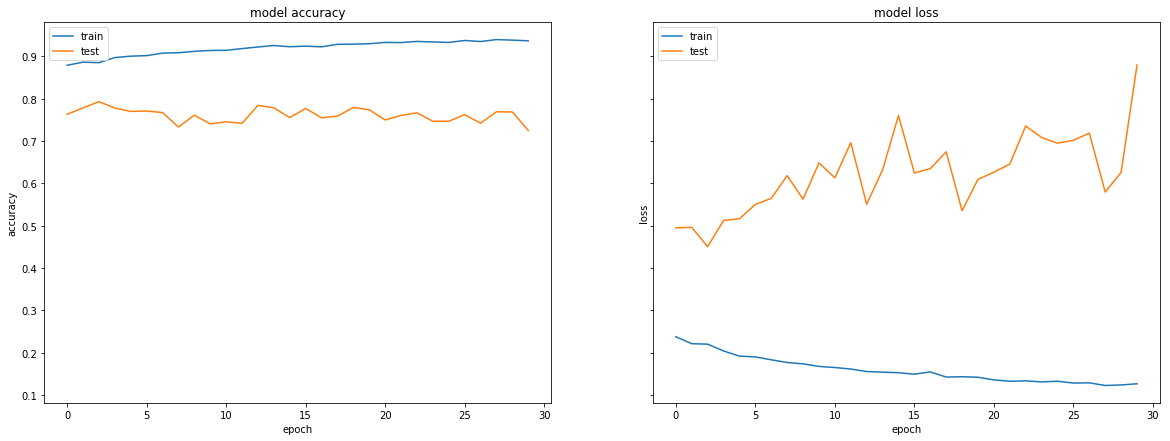

In [253]:
plot_history(history)